# Aliza Muslimah
# PYTN-07

# Assignment 1

# Preprocessing

In [1]:
# Import Libraries
import math
import statistics
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import string
from sklearn.impute import KNNImputer
import statsmodels.api as sm 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Membaca Dataset
df_nyc = pd.read_csv('nyc-rolling-sales.csv.zip', skipinitialspace=True)
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [4]:
def check_missing_value(a):
    print(a.isnull().sum().sort_values(ascending=False))
    
check_missing_value(df_nyc)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64


In [5]:
#Menghapus kolom yang tidak diperlukan

no = ['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE']
df_nyc.drop(no, axis=1, inplace=True)

In [6]:
#Mengubah Tipe Kolom

#Tipe kolom 'SALE PRICE' harus numerik dan missing value akan di-replace dengan NaN
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')

# Tipe kolom 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' harus numerik
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET'] = pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')

# Tipe kolom 'SALE DATE' harus datetime
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

# Tipe kolom dibawah harus caregorical
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df_nyc[col] = df_nyc[col].astype('category')

In [7]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [8]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [9]:
# Cek data duplikat
sum(df_nyc.duplicated())

959

In [10]:
# Hapus data duplikat
df_nyc = df_nyc.drop_duplicates(df_nyc.columns, keep='last')

In [11]:
sum(df_nyc.duplicated())

0

In [12]:
# Menghilangkan value yang berisi null
df_nyc = df_nyc[df_nyc['LAND SQUARE FEET'].notnull()]
df_nyc = df_nyc[df_nyc['GROSS SQUARE FEET'].notnull()]
df_nyc = df_nyc[df_nyc['SALE PRICE'].notnull()]

<Figure size 864x360 with 0 Axes>

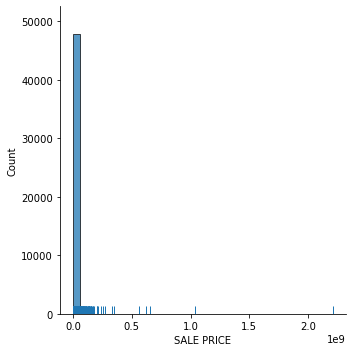

In [13]:
#Melihat distribusi data
plt.figure(figsize=(12,5))
sns.displot(df_nyc['SALE PRICE'], bins=40, rug=True)
plt.show()

<Figure size 864x360 with 0 Axes>

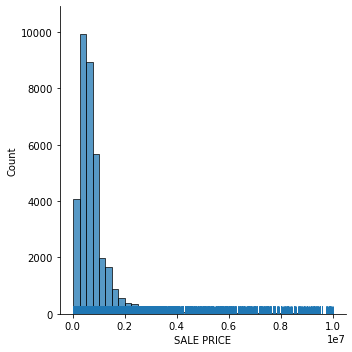

In [14]:
#Menghilangkan outliers
df_n = df_nyc[(df_nyc['SALE PRICE'] > 10000) & (df_nyc['SALE PRICE'] < 10000000)]

plt.figure(figsize=(12,5))
sns.displot(df_n['SALE PRICE'], bins=40, rug=True)
plt.show()

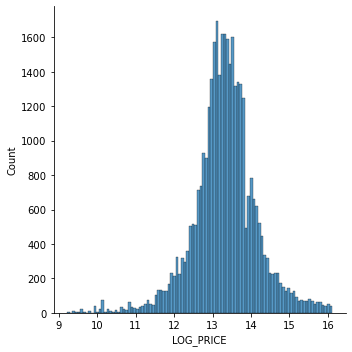

In [15]:
# Mengubah nilai'SALE PRICE' ke nilai lognya
df_n['LOG_PRICE'] = np.log(df_n['SALE PRICE'])
sns.displot(df_n['LOG_PRICE'], bins=100)

In [16]:
df_n['LOG_PRICE'].describe()

count    36181.000000
mean        13.323709
std          0.840553
min          9.210440
25%         12.900656
50%         13.321214
75%         13.760918
max         16.118096
Name: LOG_PRICE, dtype: float64

Data sudah berdistribusi normal sehingga data siap digunakan

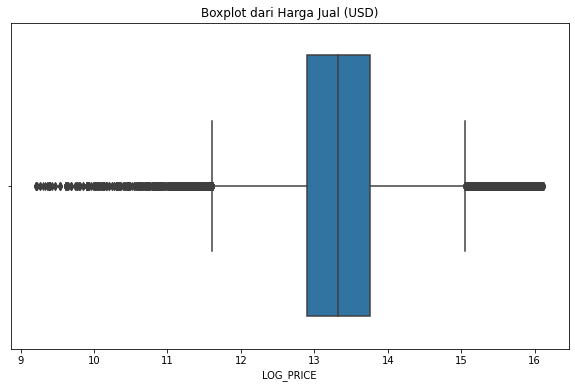

In [17]:
# plot kurva dengan boxplot untuk melihat tampilan lain dari data

plt.figure(figsize=(10,6))
sns.boxplot(x='LOG_PRICE', data = df_n)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot dari Harga Jual (USD)")
plt.show()

# Measure of Central Tendency : Mean

In [18]:
# Mencari nilai Mean dari kolom 'SALE PRICE'
mean = df_n['LOG_PRICE'].mean()
print('Mean : ', mean)

Mean :  13.323709361183091


# Measure of Central Tendency : Median

In [19]:
# Mencari nilai Median dari kolom 'SALE PRICE'
median = df_n['LOG_PRICE'].median()
print('Median : ', median)

Median :  13.321214236149494


# Measure of Central Tendency : Modus

In [20]:
# Mencari nilai Modus dari kolom 'YEAR BUILT'
tahun_pembuatan = df_nyc['YEAR BUILT'].value_counts()
tahun_pembuatan

1920    4471
1930    3683
1925    3387
0       2871
1910    2606
        ... 
1889       1
1875       1
1829       1
1891       1
1851       1
Name: YEAR BUILT, Length: 151, dtype: int64

Diketahui bahwa modus dari 'YEAR BUILT' adalah tahun 1920


# Measure of Spread : Range

In [21]:
# Mencari Range dari kolom 'YEAR BUILT'
maxi = tahun_pembuatan.max()
print('Nilai maximal : ', maxi)
mini = tahun_pembuatan.min()
print('Nilai minimal : ', mini)
range = maxi - mini
print('Range : ', range)  

Nilai maximal :  4471
Nilai minimal :  1
Range :  4470


# Measure of Spread : Variance

In [22]:
# Mencari variance dari kolom 'SALE PRICE'
variance = df_n['LOG_PRICE'].var()
print('Variance : ', variance)

Variance :  0.7065287124016151


# Measure of Spread : Standard Deviation

In [23]:
# Mencari standard deviation dari kolom 'SALE PRICE'
std = np.sqrt(variance)
print('Standard Deviation : ', std)

Standard Deviation :  0.8405526232197572


In [24]:
# Cara lain
std1 = df_n['LOG_PRICE'].std()
print('Standard Deviation : ', std1) 

Standard Deviation :  0.8405526232197572


# Probability Distribution

In [25]:
# Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image 
import numpy as np

import seaborn as sns
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(5,5)})

-0.26418219250538066


<AxesSubplot:xlabel='LOG_PRICE', ylabel='Density'>

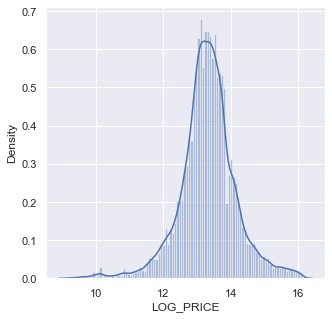

In [26]:
# Distribusi dari nilai log 'SALE PRICE'
print(df_n['LOG_PRICE'].skew())
sns.distplot(df_n['LOG_PRICE'], bins=100)

In [27]:
df_n['LOG_PRICE'].mean()

13.323709361183091

Distribusi dari 'LOG_PRICE' adalah distribui normal karena memiliki kurva kerapatan berbentuk lonceng, simetris, berpusat di sekitar meannya, dengan penyebarannya ditentukan oleh deviasi standarnya yang menunjukkan bahwa data di dekat mean lebih sering terjadi daripada data yang jauh dari mean.

In [28]:
df_n['BUILDING CLASS CATEGORY'].value_counts() 

01 ONE FAMILY DWELLINGS                         12543
02 TWO FAMILY DWELLINGS                          9736
10 COOPS - ELEVATOR APARTMENTS                   2834
13 CONDOS - ELEVATOR APARTMENTS                  2689
03 THREE FAMILY DWELLINGS                        2293
07 RENTALS - WALKUP APARTMENTS                   1608
15 CONDOS - 2-10 UNIT RESIDENTIAL                 778
09 COOPS - WALKUP APARTMENTS                      547
04 TAX CLASS 1 CONDOS                             543
22 STORE BUILDINGS                                429
12 CONDOS - WALKUP APARTMENTS                     370
14 RENTALS - 4-10 UNIT                            311
05 TAX CLASS 1 VACANT LAND                        225
29 COMMERCIAL GARAGES                             219
44 CONDO PARKING                                  160
21 OFFICE BUILDINGS                               148
30 WAREHOUSES                                     143
27 FACTORIES                                       94
31 COMMERCIAL VACANT LAND   

In [29]:
sum(df_n['BUILDING CLASS CATEGORY'].value_counts())

36181

In [30]:
# Menghitung Distribusi Peluang HOSPITAL AND HEALTH FACILITIES dari BUILDING CLASS CATEGORY
P_h = 19/36181
print('DIstribusi Peluang HOSPITAL AND HEALTH FACILITIES dari BUILDING CLASS CATEGORY adalah :', P_h)

DIstribusi Peluang HOSPITAL AND HEALTH FACILITIES dari BUILDING CLASS CATEGORY adalah : 0.0005251375031093668


# Confidence Interval

In [31]:
# Menghitung CI HOSPITAL AND HEALTH FACILITIES dari Building Class Category

In [32]:
# Populasi Building Class Category
n = 36181

# Proporsi HOSPITAL AND HEALTH FACILITIES dari Building Class Category
P_h = 19/36181
P_h 

0.0005251375031093668

In [33]:
# Standard Error
se_h = np.sqrt(P_h * (1-P_h)/n) 
se_h 

0.00012044316858547533

In [34]:
# Menghitung CI menggunakan rumus diatas dengan z-score adalah 1.96 untuk confidence interval 95%
z_score = 1.96
lcb = P_h - z_score*se_h #lower limit dari CI
ucb = P_h + z_score*se_h #Upper limit dari CI

lcb,ucb 

(0.0002890688926818352, 0.0007612061135368985)

In [35]:
# Cara lain
sm.stats.proportion_confint(n*P_h, n)

(0.0002890732304979491, 0.0007612017757207846)

Jadi, Convidence Interval HOSPITAL AND HEALTH FACILITIES dari Building Class Category adalah (0.0002890732304979491, 0.0007612017757207846)

# Hypothesis Testing

In [36]:
# Memperbaiki Kolom 'BOROUGH
df_n['BOROUGH'] = df_n['BOROUGH'].astype(str) 
df_n['BOROUGH'] = df_n['BOROUGH'].str.replace('1','Manhattan')
df_n['BOROUGH'] = df_n['BOROUGH'].str.replace('2','Bronx')
df_n['BOROUGH'] = df_n['BOROUGH'].str.replace('3','Brooklyn')
df_n['BOROUGH'] = df_n['BOROUGH'].str.replace('4','Queens')
df_n['BOROUGH'] = df_n['BOROUGH'].str.replace('5','Staten Island')

In [37]:
df_n 

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LOG_PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,15.706361
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,15.185745
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,15.894952
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,14.976421
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,15.009433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,13.381646
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,13.017003
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,13.217674
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,13.038982


In [38]:
df_bor = df_n.groupby('BOROUGH', axis=0).sum()
df_bor

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,LOG_PRICE
BOROUGH,,,,,,,,,,
Bronx,20929685,1487147,10683,526,11212,13502440.0,12851539.0,8833109,2.923204e+09,63169.173827
Brooklyn,63463621,5690738,23744,1428,25375,23991850.0,24391594.0,26728528,1.562624e+10,203589.977077
Manhattan,876068,32354,7358,543,7894,2204614.0,10866383.0,1160509,2.638975e+09,9004.625369
Queens,85826759,579994,20866,3417,24275,40616295.0,26792130.0,20701090,8.010454e+09,142267.883682
Staten Island,16527557,402935,6651,478,7123,28930572.0,11450310.0,9640993,2.628729e+09,64033.468442


Berdasarkan dataset diatas, apakah total unit rata-rata per penjualan pada borough Brooklyn lebih besar secara signifikan daripada Queens
- H0 : tidak ada perbedaan secara signifikan pada total unit rata-rata per penjualan antara borough Brooklyn dan Queens
- H1 : Terdapat perbedaan secara signifikan pada total unit rata-rata per penjualan antara borough Brooklyn dan Queens

In [39]:
Brooklyn = df_n[df_n['BOROUGH']=='Brooklyn']
Queens = df_n[df_n['BOROUGH']=='Queens']

In [40]:
total_unit_Q = df_bor.iloc[-2, 4]
mu_Q = Queens['TOTAL UNITS'].mean()
std_Q = Queens['TOTAL UNITS'].std()
total_unit_Q, mu_Q, std_Q

(24275, 2.273152916939788, 29.12838869550192)

In [41]:
total_unit_B = df_bor.iloc[-4, 4]
mu_B = Brooklyn['TOTAL UNITS'].mean()
std_B = Brooklyn['TOTAL UNITS'].std()
total_unit_B, mu_B, std_B 

(25375, 1.6833620804033436, 4.370729519754011)

In [45]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Brooklyn['TOTAL UNITS'],Queens['TOTAL UNITS'])
print("pval: ",float(pval))
if pval<0.05:
    print("Karena p-value lebih rendah dari significance level yang kita tentukan yaitu 0.05. Jadi, kita Tolak H0")
else:
    print("Karena p-value lebih besar sama dengan significance level yang kita tentukan yaitu 0.05. Jadi, kita Terima H0")

pval:  0.014389036830450569
Karena p-value lebih rendah dari significance level yang kita tentukan yaitu 0.05. Jadi, kita Tolak H0


Di sini p-value lebih rendah dari significance level yang kita tentukan yaitu 0.05. Jadi, kita reject the null hypothesis. Artinya, terdapat perbedaan yang signifikan pada total unit rata-rata per penjualan antara borough Brooklyn dan Queens